# Metodo dei Momenti per i dati della stazione di Pian di Fedaia (diga)

### Il metodo dei momenti consiste nell'uguagliare i momenti del campione con i momenti della popolazione.

In [1]:
import os
import math
from pandas import *
import pandas as pd
from datetime import datetime
%matplotlib inline
import matplotlib.pyplot as plt

from scipy.stats import genextreme,gumbel_r
from numpy import linspace
import numpy as np
import random

from statsmodels.distributions.empirical_distribution import ECDF

In [2]:
os_DatiFedaia=os.getcwd()
os.chdir(os_DatiFedaia)

In [3]:
data=pd.read_csv('DatiFedaiaSub.csv')

In [4]:
map(datetime,data['Anno'])
data=data.set_index('Anno')

#### Lista contenente le durate

In [5]:
h=[]
for i in range(len(data.columns)):
    h.append(data.columns[i])

### Si settano i grafici

In [6]:
XSMALL_SIZE=2
SMALL_SIZE=10
MEDIUM_SIZE=20
BIGGER_SIZE=30
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     #fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', linewidth=XSMALL_SIZE)

### Viene calcolata la media dei dati

In [7]:
means=data.mean()
means_ore=means[:8]
means_gg=means[8:]

In [8]:
def grafico(df,title,x_label,y_label):   
    ax=df.plot(figsize=(18,10),color=(random.random(), random.random(), random.random()))
    ax.grid(True,color='whitesmoke')
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    

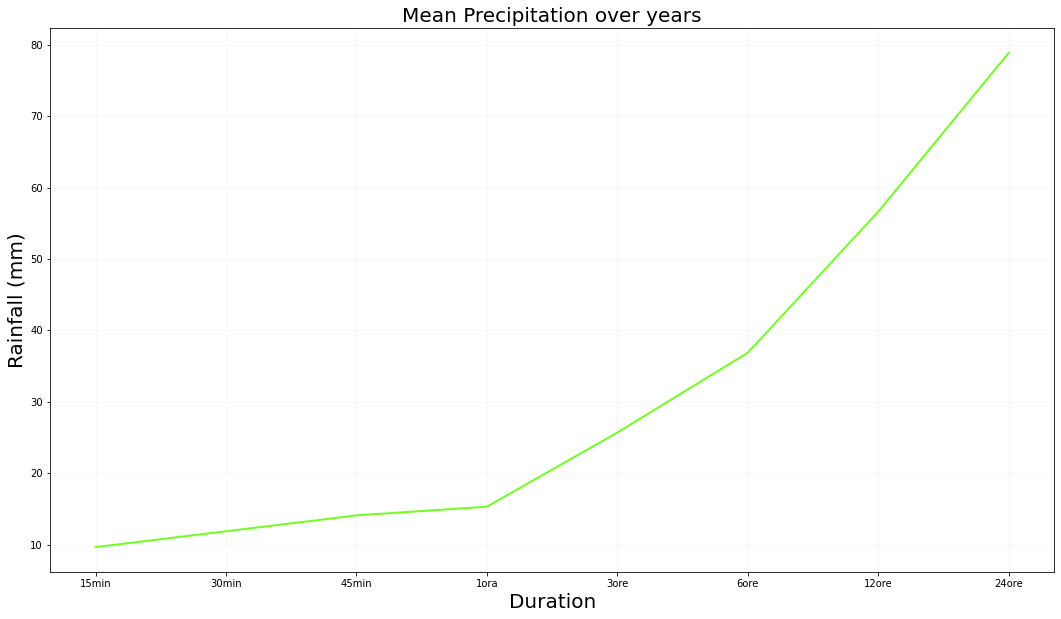

In [9]:
grafico(means_ore,'Mean Precipitation over years','Duration','Rainfall (mm)')

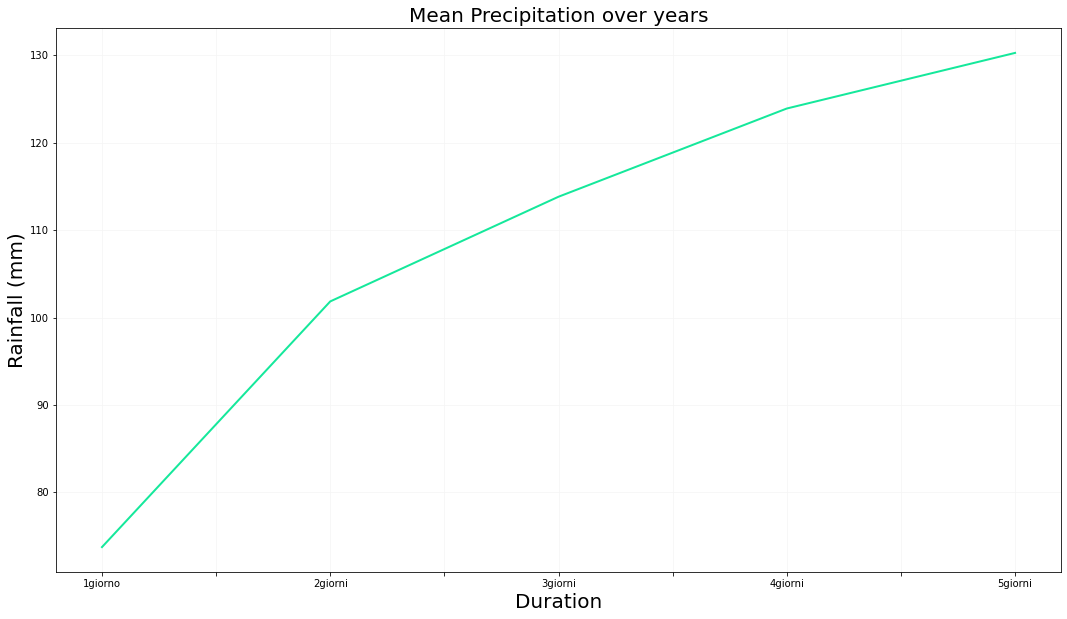

In [10]:
grafico(means_gg,'Mean Precipitation over years','Duration','Rainfall (mm)')

### Viene calcolata la varianza dei dati

In [11]:
variances=data.var()

var_ore=variances[:8]
var_gg=variances[8:]

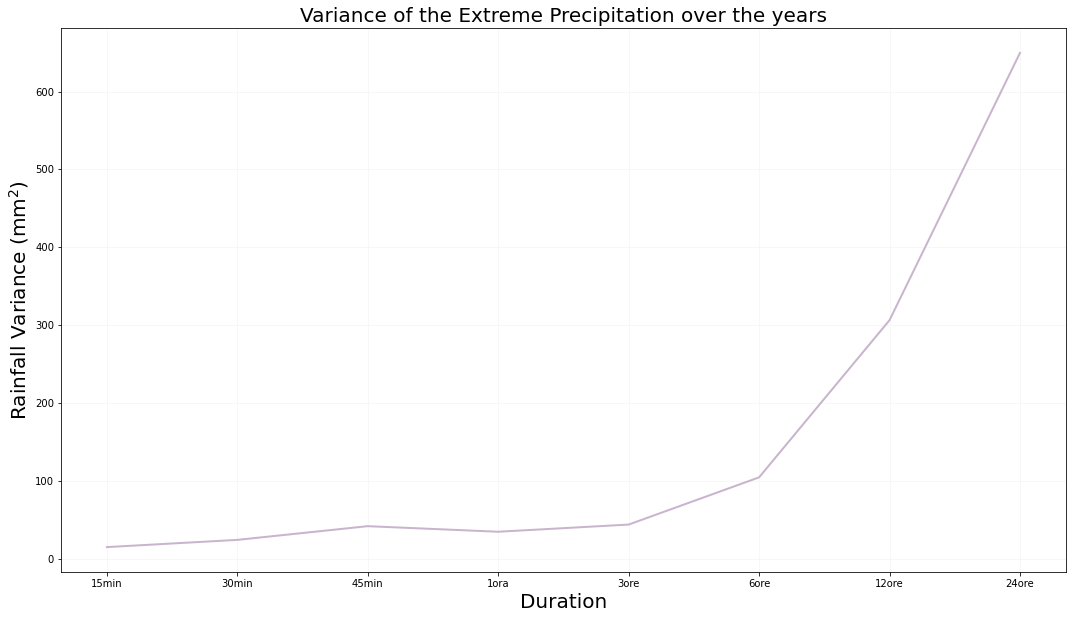

In [12]:
grafico(var_ore,'Variance of the Extreme Precipitation over the years','Duration','Rainfall Variance (mm$^2$)')

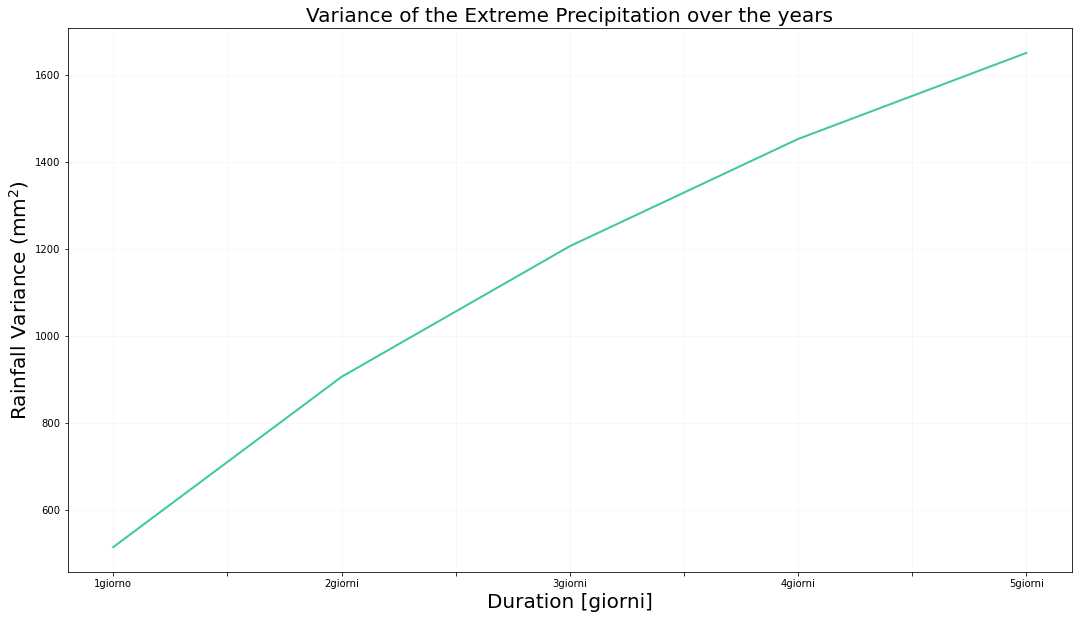

In [13]:
grafico(var_gg,'Variance of the Extreme Precipitation over the years','Duration [giorni]','Rainfall Variance (mm$^2$)')

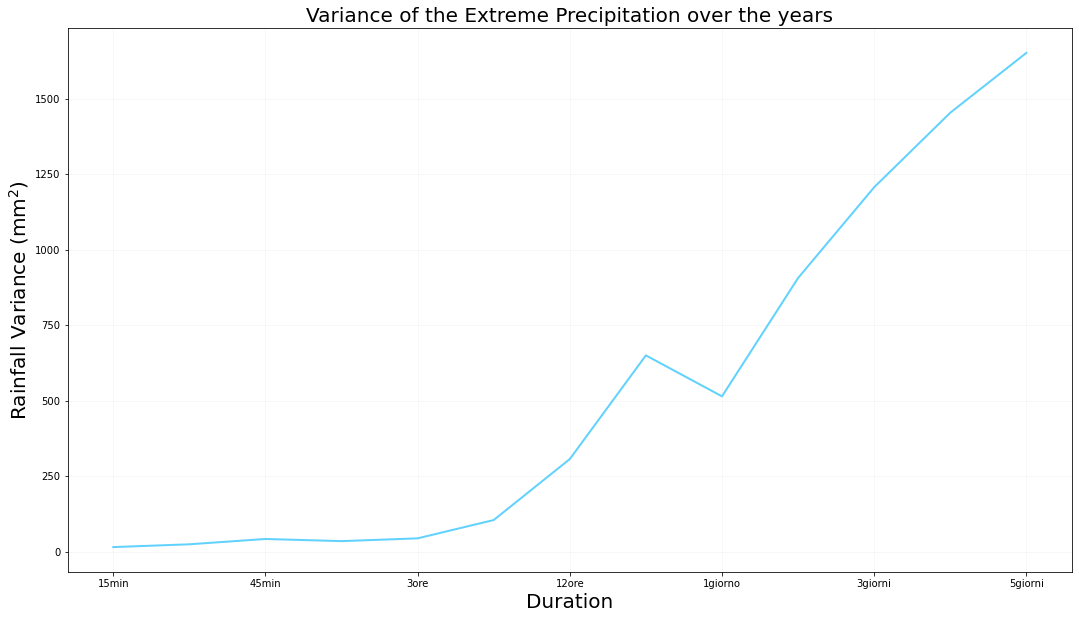

In [14]:
grafico(variances,'Variance of the Extreme Precipitation over the years','Duration','Rainfall Variance (mm$^2$)')

### Viene calcolato lo scarto quadratico medio e se ne fa il rapporto con la media

In [15]:
stds=data.std()
cv=data.std()/means

cv_ore=cv[:8]
cv_gg=cv[8:]

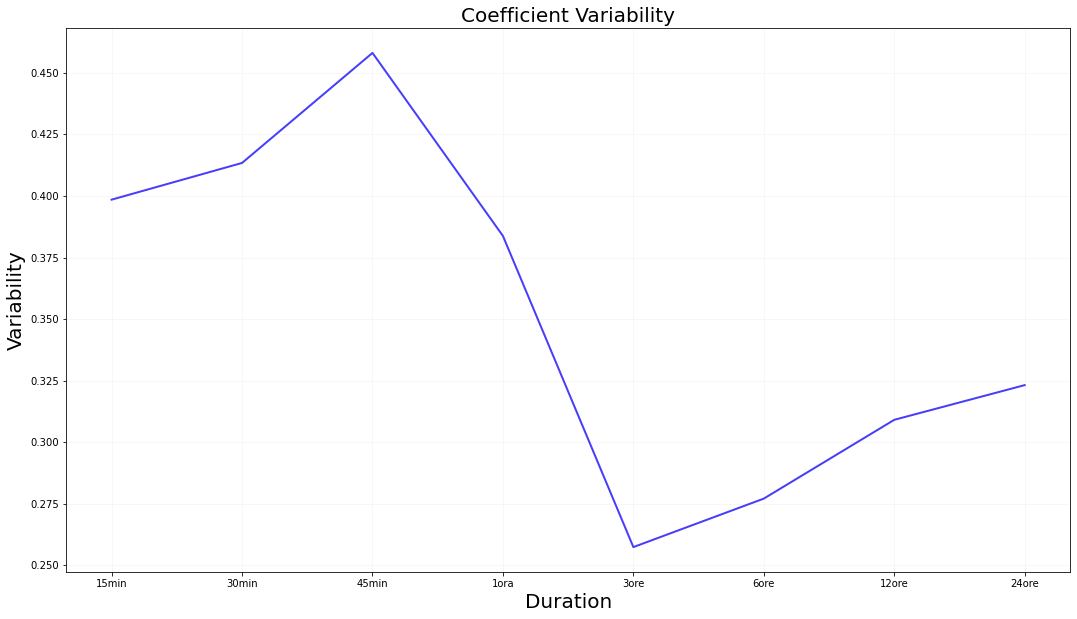

In [16]:
grafico(cv_ore,'Coefficient Variability','Duration','Variability')

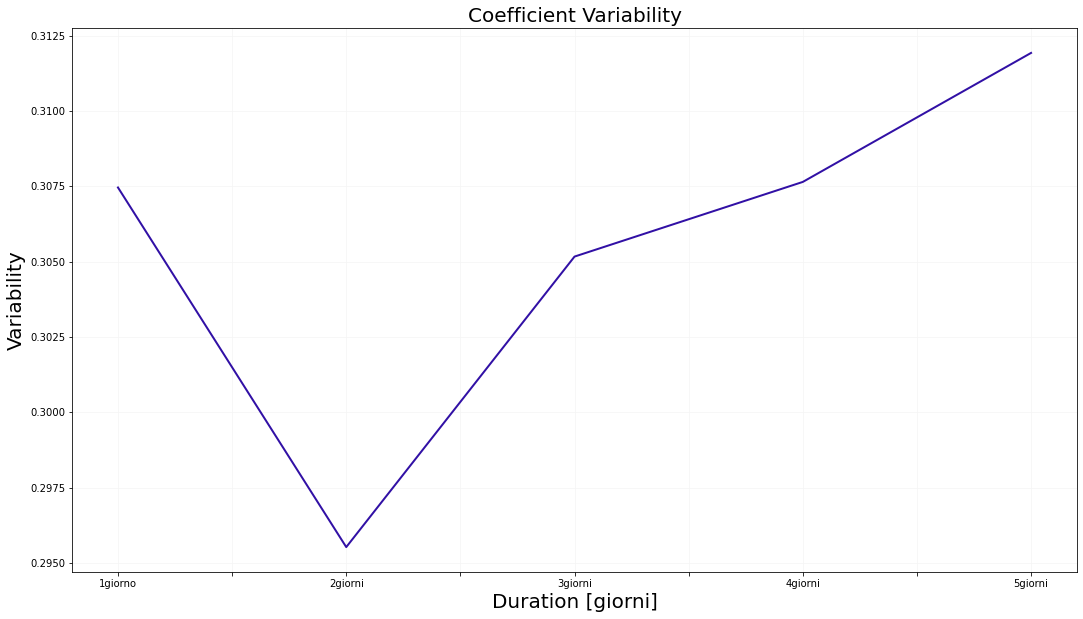

In [17]:
grafico(cv_gg,'Coefficient Variability','Duration [giorni]','Variability')

### Si definisce la funzione g che calcola i parametri relativi al metodo dei momenti

In [18]:
EulerGamma=0.57721566490153286060651209008240243 #costante di Eulero-Mascheroni
def g(m,s):
    return pd.DataFrame([m-math.sqrt(6)/math.pi*EulerGamma*s, math.sqrt(6)/math.pi*s],index=["a","b"])

In [19]:
abs_m=g(means,stds)
abs_m.to_pickle("abs_m")
abs_m

,15min,30min,45min,1ora,3ore,6ore,12ore,24ore,1giorno,2giorni,3giorni,4giorni,5giorni
a,7.915222,9.651648,11.183258,12.659236,22.712616,32.271924,48.746973,67.396004,63.534835,88.300577,98.190256,106.758154,111.987628
b,2.997042,3.822517,5.032333,4.579033,5.155363,7.965556,13.646262,19.873747,17.677322,23.467099,27.083155,29.724126,31.685376


In [20]:
def gumbel(x,abs_d,col):
    return np.exp(-np.exp(-(x-abs_d[col]["a"])/abs_d[col]["b"]))

### Viene definito lo spazio lineare 

In [21]:
def t_rain(df):   
    minimo=min(df.min()) #7.2 per le durate orarie! 
    mass=max(df.max()) #132.6 per le orarie!
    mass=mass+mass*1.5

    return np.linspace(minimo,mass,100) #t_rain

### Questa funzione crea un dataframe per graficare le curve di Gumbel calcolate con i parametri dei momenti

In [22]:
def bbb(t_r,abs_a):
    g=[]
    h=[]
    for i in range(len(abs_a.columns)):
        h.append(abs_a.columns[i])
    for i in h:
        g.append(gumbel(t_r,abs_a,i))
    
    gb=pd.DataFrame(g).T
    gb.index=t_r
    gb.columns=h
    return gb

In [23]:
import random
colors={}
c=[]
for i in h:
    colore=(random.random(), random.random(), random.random())
    colors.update({i:colore})
    c.append(colors[i])
    
c_min=c[:3]
c_ore=c[3:8]
c_gg=c[8:]

In [24]:
absM=abs_m.T
absM_min=absM[:3]
absM_ore=absM[3:8]
absM_gg=absM[8:]

In [25]:
def grafG(df,title,x_label,y_label,leg_label,cx):
    T=t_rain(df.T)
    gb=bbb(T,df)
    ax=gb.plot(figsize=(18,10),color=cx)
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True,color='whitesmoke')
    ax.legend (title= leg_label, loc=4, fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

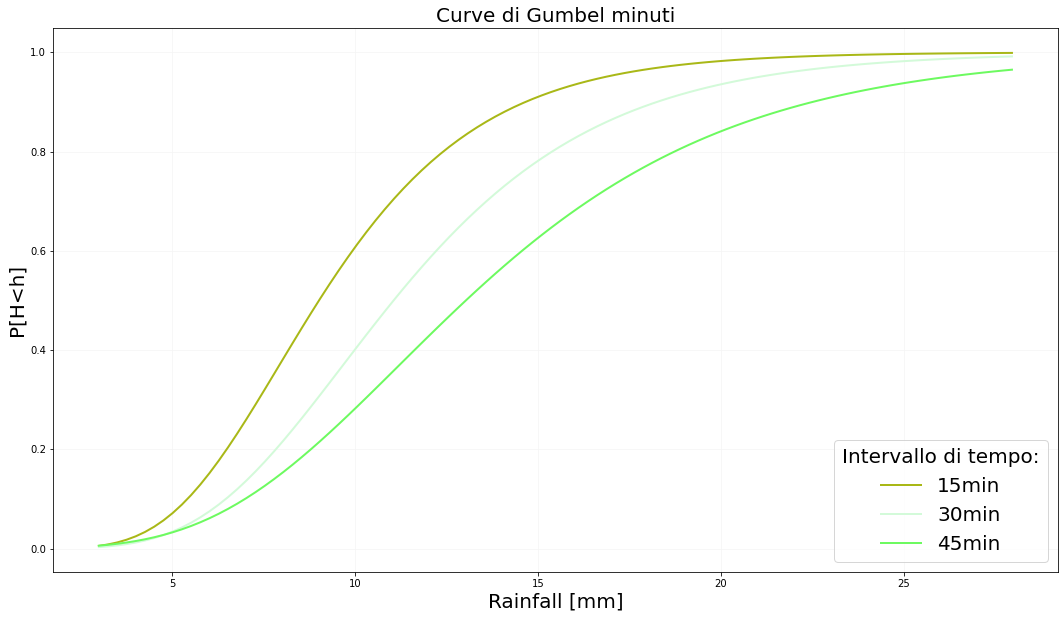

In [26]:
grafG(absM_min.T,'Curve di Gumbel minuti','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_min)

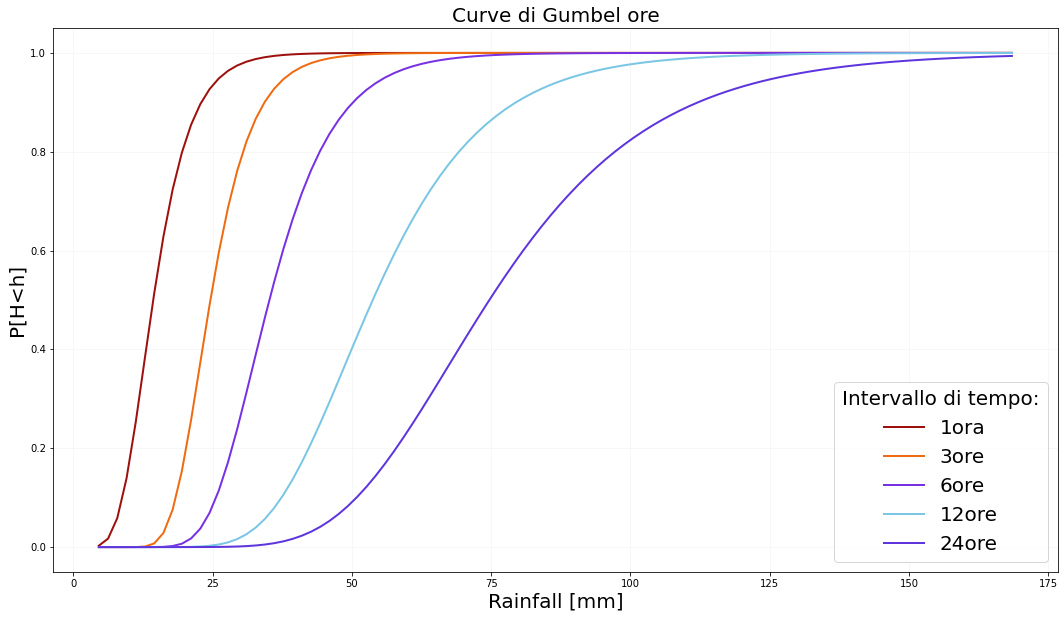

In [27]:
grafG(absM_ore.T,'Curve di Gumbel ore','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_ore)

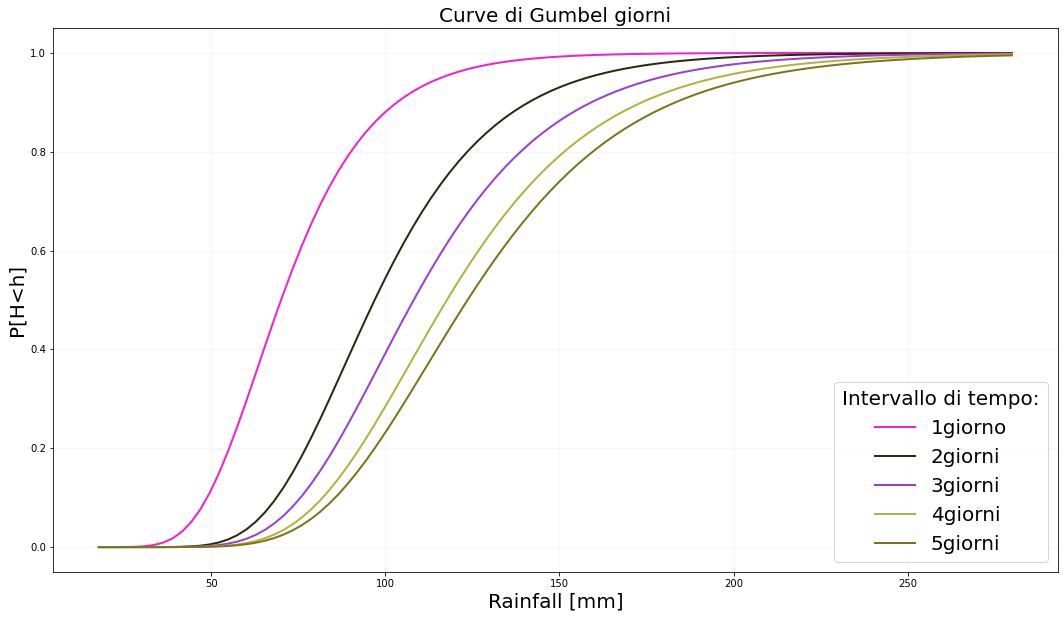

In [28]:
grafG(absM_gg.T,'Curve di Gumbel giorni','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_gg)

In [29]:
def grafG_E(df,title,x_label,y_label,leg_label,cx):
    T=t_rain(df.T)
    gb=bbb(T,df)
    ax=gb.plot(figsize=(18,10),color=cx)
    
    ecdf={}
    h=[]
    for i in range(len(df.columns)):
        h.append(df.columns[i])
    for i in h:
        ecdf.update({i:ECDF(data[i].dropna())})
        ax.plot(data[i].dropna(),ecdf[i](data[i].dropna()),'o',c=colors[i])
        
    ax.set_title(title,size=MEDIUM_SIZE)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.grid(True,color='whitesmoke')
    ax.legend (title= leg_label, loc=4, fontsize=MEDIUM_SIZE, title_fontsize=MEDIUM_SIZE)

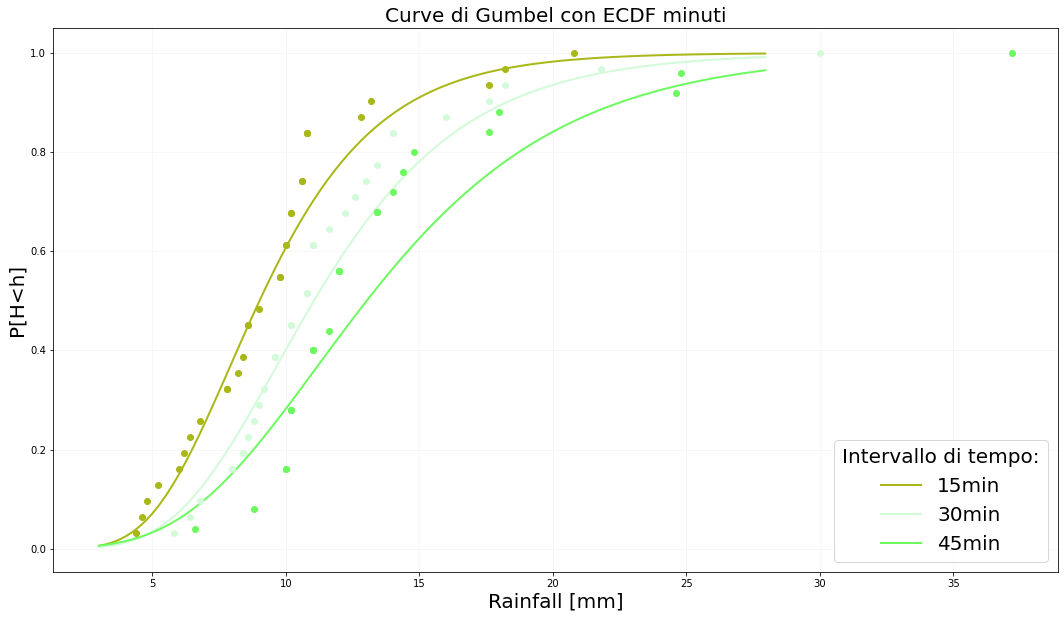

In [30]:
grafG_E(absM_min.T,'Curve di Gumbel con ECDF minuti','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_min)

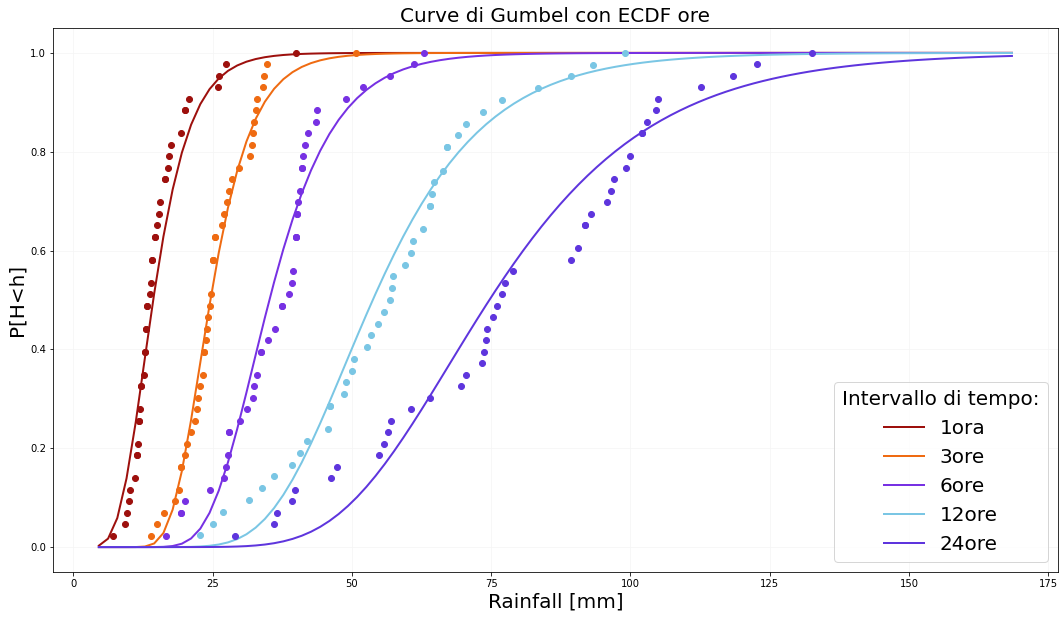

In [31]:
grafG_E(absM_ore.T,'Curve di Gumbel con ECDF ore','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_ore)

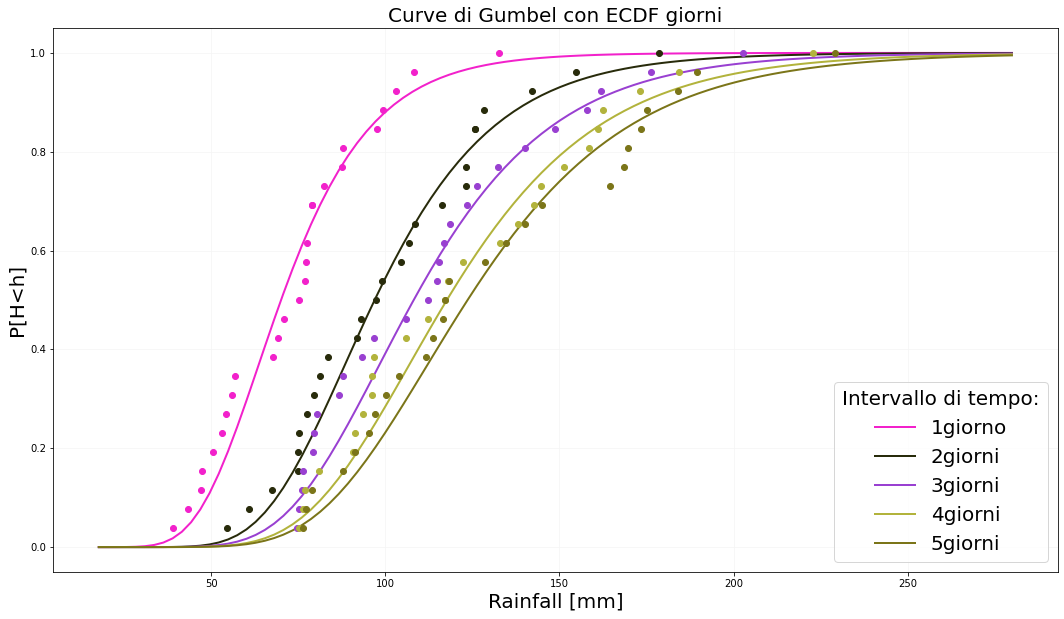

In [32]:
grafG_E(absM_gg.T,'Curve di Gumbel con ECDF giorni','Rainfall [mm]','P[H<h]',"Intervallo di tempo:",c_gg)